# Part 2

### Part 2.1: Plotting H20 Linear Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

In [3]:
# Create a DataFrame
five_Mhz = {'Voltage (mV)':         [1.5,  1.4,  1.3,  1.2,  1.1,   1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2], 
            'Amplitude Power': [11.2, 11.2, 10.2,  9,    8.2, 7.8, 6.4, 5.4, 4.2,   3, 2.7,  2,  1.7, 0.8],
            'Power (dBm)': [-64,-64,-65,-66.5,-67,-67,-68,-69,-70.9,-71.8,-73.5,-74.6,-77.2,-79.5]}
df_h20_fiveMHz = pd.DataFrame(five_Mhz)

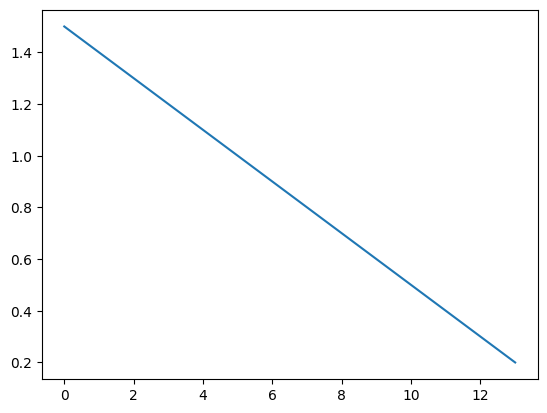

In [4]:
plt.plot(df_h20_fiveMHz['Voltage (mV)'])

In [5]:
## Find the current
resistanceVal = 1.0
numTurns = 75
radius = 2.51 / 2 * 0.01  ## in meters

df_h20_fiveMHz['Current (mA)'] = df_h20_fiveMHz['Voltage (mV)'] / resistanceVal
df_h20_fiveMHz['Num'] = df_h20_fiveMHz['Current (mA)'] * np.pow(10.0, -3) * numTurns * 8 * 4 * np.pi * np.pow(10.0, -7)
df_h20_fiveMHz['Denom'] = (radius/2)*np.sqrt(125)
df_h20_fiveMHz['Magnetic Field'] = df_h20_fiveMHz['Num']/df_h20_fiveMHz['Denom']

Text(0.5, 0, 'Field Strength')

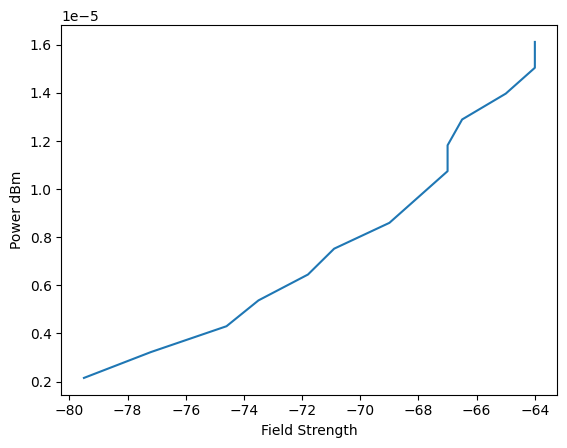

In [6]:
plt.plot(df_h20_fiveMHz['Power (dBm)'], df_h20_fiveMHz['Magnetic Field'])
plt.ylabel("Power dBm")
plt.xlabel("Field Strength")

In [7]:
# Create a DataFrame
hund_khz = {'Voltage (mV)':         [1.5,  1.4,  1.3,  1.2,  1.1,   1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3], 
            'Amplitude Power': [450,420,400,370,350,320,300,250,230,220,200,180,160],
            'Power (dBm)': [-8.80,-9.36,-9.91,-10.55,-11.28,-12.03,-12.88,-14.01,-15.16,-16.43,-18.01,-19.99,-22.47]}
df_h20_hundkhz = pd.DataFrame(hund_khz)
df_h20_hundkhz['Current (mA)'] = df_h20_fiveMHz['Voltage (mV)'] / resistanceVal

In [8]:
df_h20_hundkhz['Current (mA)'] = df_h20_fiveMHz['Voltage (mV)'] / resistanceVal
df_h20_hundkhz['Num'] = df_h20_fiveMHz['Current (mA)'] * 100 * numTurns * 8 * 4 * np.pi * np.pow(10.0, -7)
df_h20_hundkhz['Denom'] = (0.15/2)*np.sqrt(125)
df_h20_hundkhz['Magnetic Field'] = df_h20_hundkhz['Num']/df_h20_fiveMHz['Denom']

Text(0, 0.5, 'Field Strength')

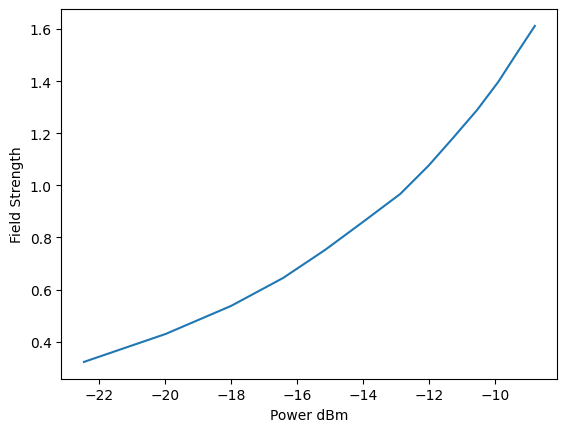

In [9]:
plt.plot(df_h20_hundkhz['Power (dBm)'], df_h20_hundkhz['Magnetic Field'])
plt.xlabel("Power dBm")
plt.ylabel("Field Strength")

R^2 linear fit of 100 kHz: 0.946653461235132 with equation 2.2887766684445205 + 0.09497986617819947*POW
R^2 linear fit of 5 MHz:   0.9494685301857625 with equation 7.165163632162302e-05 + 8.94920345771188e-07*POW


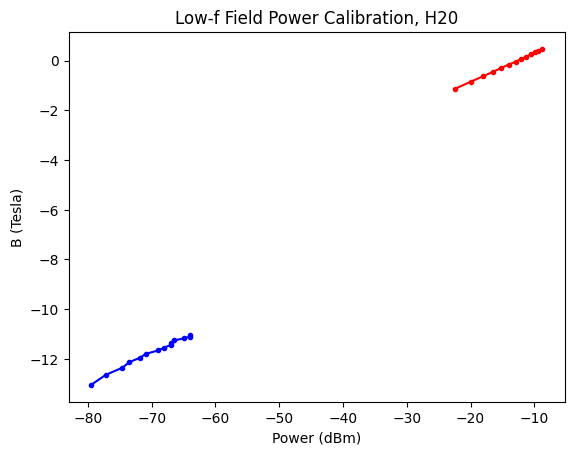

In [10]:
pow_hund = df_h20_hundkhz['Power (dBm)']
pow_fivM = df_h20_fiveMHz['Power (dBm)']

rsq_hundkhz = polyfit(pow_hund, df_h20_hundkhz['Magnetic Field'], 1)
rsp_fivemhz = polyfit(pow_fivM, df_h20_fiveMHz['Magnetic Field'], 1)

plt.title("Low-f Field Power Calibration, H20")
plt.plot(pow_hund, np.log(df_h20_hundkhz['Magnetic Field']), 'r.-')
plt.plot(pow_fivM, np.log(df_h20_fiveMHz['Magnetic Field']), 'b.-')
plt.legend
plt.xlabel("Power (dBm)")
plt.ylabel("B (Tesla)")

print(f"R^2 linear fit of 100 kHz: {rsq_hundkhz['determination']} with equation {rsq_hundkhz['polynomial'][1]} + {rsq_hundkhz['polynomial'][0]}*POW")
print(f"R^2 linear fit of 5 MHz:   {rsp_fivemhz['determination']} with equation {rsp_fivemhz['polynomial'][1]} + {rsp_fivemhz['polynomial'][0]}*POW")
intercept = rsq_hundkhz['polynomial'][1]

### Part 2.2 Plotting H20 with Constant Field

In [11]:
# Create a DataFrame
freqtopow_4_8 = {'Frequency (MHz)':         [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1], 
                          'Power (dBm)': [-9.86,-10.63,-11.56,-12.54,-13.90,-15.57,-17.43,-19.85,-22.97,-29.07]}
df_h20_freqtopow_4_8mV = pd.DataFrame(freqtopow_4_8)

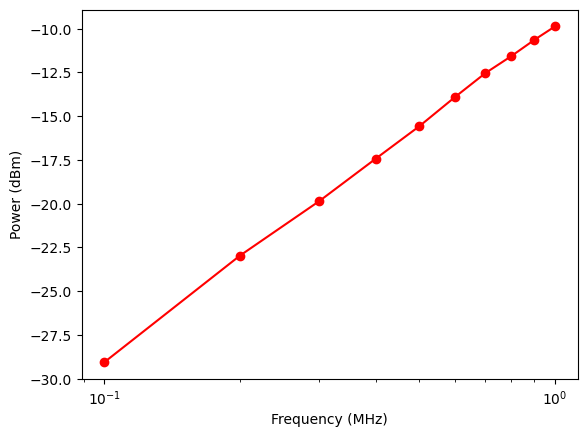

In [12]:
plt.plot(df_h20_freqtopow_4_8mV['Frequency (MHz)'], df_h20_freqtopow_4_8mV['Power (dBm)'], 'ro-')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBm)")
plt.xscale("log")

In [13]:
r_squared_h20 = polyfit(df_h20_freqtopow_4_8mV['Frequency (MHz)'], df_h20_freqtopow_4_8mV["Power (dBm)"], 2)
h20_freq = df_h20_freqtopow_4_8mV['Frequency (MHz)']
print(r_squared_h20['determination'])

intercept = r_squared_h20['polynomial'][2]
lin_slope = r_squared_h20['polynomial'][1]
qud_slope = r_squared_h20['polynomial'][0]

0.9864122266816567


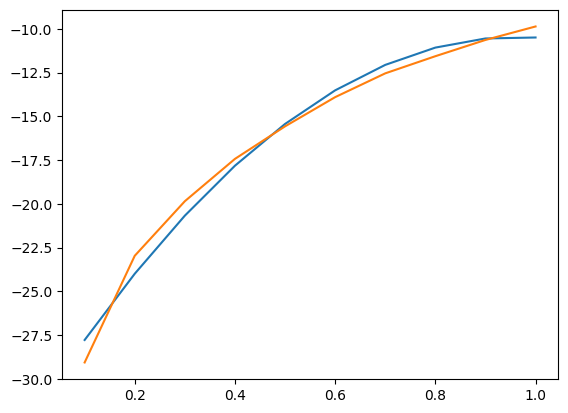

In [14]:
plt.plot(h20_freq, (h20_freq**2)*qud_slope + (h20_freq)*lin_slope + intercept)
plt.plot(h20_freq, df_h20_freqtopow_4_8mV["Power (dBm)"])

In [15]:
print(f"{qud_slope:.2f}*freq^2 + {lin_slope:.2f}*freq + {intercept:.2f}")

-23.33*freq^2 + 44.87*freq + -32.04


In [16]:
# Create a DataFrame
freqtopow_4_8_incEnd = {'Frequency (MHz)': [5,         4,     3,    2,    1,   0.9,   0.8,   0.7,   0.6,   0.5,   0.4,   0.3,   0.2,   0.1], 
                          'Power (dBm)':   [-10.48,-10.2,-10.16,-9.96,-9.86,-10.63,-11.56,-12.54,-13.90,-15.57,-17.43,-19.85,-22.97,-29.07]}
df_h20_freqtopow_4_8mV_end = pd.DataFrame(freqtopow_4_8_incEnd)

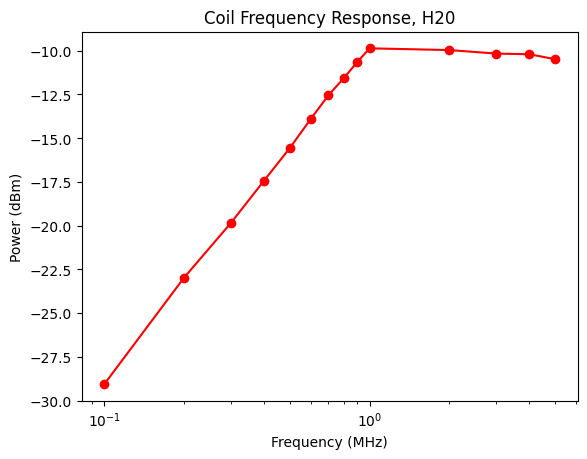

In [17]:
plt.plot(df_h20_freqtopow_4_8mV_end['Frequency (MHz)'], df_h20_freqtopow_4_8mV_end['Power (dBm)'], 'ro-')
plt.title("Coil Frequency Response, H20") 
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBm)")
plt.xscale("log")

In [18]:
## Defining H20's readouts for 100 kHz current to Power and 5 MHz current to Power

curr_100_h20 = {'Current (mA)':         [45, 42,40,37,35,32,30,25,23,22,20,18,16], 
                'Power (dBm)': [-8.80,-9.36,-9.91,-10.55,-11.28,-12.03,-12.88,-14.01,-15.16,-16.43,-18.01,-19.99,-22.47]}
df_curr_100_h20 = pd.DataFrame(curr_100_h20)


list_vals = [i/0.9 for i in [ 11.2, 11.2, 10.2, 9, 8.2, 7.8, 6.4, 5.4, 4.2, 3, 2.7, 2, 1.7, 0.8]]
curr_5M_h20 = {'Current (mA)':         list_vals, 
               'Power (dBm)':  [-64,    64,-65,-66.5,-67,-67,-68,-69,-70.9,-71.8,-73.5,-74.6,-77.2,-79.5] }

df_curr_5M_h20 = pd.DataFrame(curr_5M_h20)

## assumes that all units are correct - i.e. Amperes, meters
def convertToMagField(curr_val, num_coils, radius):
    u0 = 4 * np.pi * 1e-7
    coeff = 8 / np.sqrt(125)

    num = [i * num_coils * u0 * coeff for i in curr_val]
    return [i/radius for i in num]

print(curr_100_h20['Current (mA)'])

convertToMagField(curr_100_h20['Current (mA)'], 75, 0.0125)
# curr_100_h20['Magnetic Field (T)'] = convertToMagField(curr_100_h20['Current (mA)']*pow(10, -3), 75, 2.51/(100*2))

[45, 42, 40, 37, 35, 32, 30, 25, 23, 22, 20, 18, 16]


[np.float64(0.24277759710476748),
 np.float64(0.22659242396444965),
 np.float64(0.21580230853757107),
 np.float64(0.19961713539725326),
 np.float64(0.1888270199703747),
 np.float64(0.17264184683005687),
 np.float64(0.16185173140317832),
 np.float64(0.13487644283598194),
 np.float64(0.12408632740910339),
 np.float64(0.1186912696956641),
 np.float64(0.10790115426878553),
 np.float64(0.097111038841907),
 np.float64(0.08632092341502844)]

In [19]:
## assumes that all units are correct - i.e. Amperes, meters
def convertToMagField_Int(curr_val, num_coils, radius):
    u0 = 4 * np.pi * pow(10, -7)
    coeff = 8 / np.sqrt(125)

    num = curr_val * num_coils * u0 * coeff
    
    return num/radius
    
print(convertToMagField_Int(4.8*1e-3, 75, 1e-2*2.51/2)*1e6)
print(convertToMagField_Int(6.4*1e-3, 75, 1e-2*2.51/2)*1e6)

25.7931046060842
34.3908061414456


In [20]:
## additional calculations to help:
print(f"numTurns = {numTurns}, radius = {radius}")

curr = 4.8 * np.pow(10.0, -3)
num = curr * numTurns * 8 * 4 * np.pi * np.pow(10.0, -7)
denom = (radius/2)*np.sqrt(125)
mag_field = num/denom

print(f"{mag_field * np.pow(10.0, 6)} uT")

numTurns = 75, radius = 0.012549999999999999
51.58620921216839 uT


In [21]:
## additional calculations to help:

curr = 6.4 * np.pow(10.0, -3)
num = curr * numTurns * 8 * 4 * np.pi * np.pow(10.0, -7)
denom = (radius/2)*np.sqrt(125)
mag_field = num/denom

print(f"{mag_field * np.pow(10.0, 6)} uT")

68.78161228289119 uT


### Part 2.3: Plotting H10 and H15 Values

### Part 2.3 Plotting H10 and H5

In [22]:
h10_100k = {'Current (mA)':         [50.4, 46.0, 41.2, 36.4, 31.2, 26.2, 22.0, 16.4, 11.6],
            'Power (dBm)': [-18.2, -19.44, -20.46, -21.62, -22.97, -24.54, -26.49, -28.99, -32.51]}
h10_5M = {'Current (mA)':         [4.5, 4.1, 3.7, 3.2, 2.8, 2.3, 1.9, 1.4, 1.1],
            'Power (dBm)': [-18.9, -19.81, -20.83, -22.01, -23.37, -24.95, -26.88, -29.38, -32.94]}
#####--------#####--------#####
h5_100k = {'Current (mA)':         [51.6, 46.8, 41.6, 36.2, 31.2, 26.0, 20.8, 15.6, 10.4],
            'Power (dBm)': [-31.16, -32.10, -33.11, -34.28, -35.6, -37.19, -39.13, -41.63, -45.15]}
h5_5M = {'Current (mA)':         [4.8, 3.9, 3.4, 3, 2.56, 2.2, 1.7, 1.3, 0.9],
            'Power (dBm)': [-32.95, -33.87, -34.89, -36.04, -37.38, -38.95, -40.89, -43.36, -46.87]}
#####--------#####--------#####
hund_khz = {'Voltage (mV)':         [1.5,  1.4,  1.3,  1.2,  1.1,   1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3], 
            'Amplitude Power': [450,420,400,370,350,320,300,250,230,220,200,180,160],
            'Power (dBm)': [-8.80,-9.36,-9.91,-10.55,-11.28,-12.03,-12.88,-14.01,-15.16,-16.43,-18.01,-19.99,-22.47]}
df_h20_hundkhz = pd.DataFrame(hund_khz)
df_h20_hundkhz['Current (mA)'] = df_h20_fiveMHz['Voltage (mV)'] / resistanceVal
df_h20_hundkhz['Num'] = df_h20_hundkhz['Current (mA)'] * np.pow(10.0, -3) * numTurns * 8 * 4 * np.pi * np.pow(10.0, -7)
df_h20_hundkhz['Magnetic Field'] = df_h20_hundkhz['Num']/denom

five_Mhz = {'Voltage (mV)':         [1.5,  1.4,  1.3,  1.2,  1.1,   1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3], 
            'Power (dBm)': [-10.99,-11.51, -12.05, -12.69, -13.41, -14.15, -15.01, -15.95, -17.12, -18.41, -19.96, -21.95, -24.46]}
df_h20_fiveMHz = pd.DataFrame(five_Mhz)
df_h20_fiveMHz['Current (mA)'] = df_h20_fiveMHz['Voltage (mV)'] / resistanceVal
df_h20_fiveMHz['Num'] = df_h20_fiveMHz['Current (mA)'] * np.pow(10.0, -3) * numTurns * 8 * 4 * np.pi * np.pow(10.0, -7)
df_h20_fiveMHz['Magnetic Field'] = df_h20_fiveMHz['Num']/denom

In [23]:
df_h10_100k = pd.DataFrame(h10_100k)
df_h10_5M = pd.DataFrame(h10_5M)

df_h5_100k = pd.DataFrame(h5_100k)
df_h5_5M = pd.DataFrame(h5_5M)

In [24]:
## Find the current
resistanceVal = 1.0
numTurns = 75
radius = 2.51 / 2 * 0.01  ## in meters
denom = (radius/2)*np.sqrt(125)

df_h10_100k['Num'] = df_h10_100k['Current (mA)'] * np.pow(10.0, -3) * numTurns * 8 * 4 * np.pi * np.pow(10.0, -7)
df_h10_100k['Magnetic Field'] = df_h10_100k['Num']/denom
# print(df_h10_100k['Magnetic Field'])

df_h10_5M['Num'] = df_h10_5M['Current (mA)'] * np.pow(10.0, -3) * numTurns * 8 * 4 * np.pi * np.pow(10.0, -7)
df_h10_5M['Magnetic Field'] = df_h10_5M['Num']/denom
# print(df_h10_5M['Magnetic Field'])

df_h5_100k['Num'] = df_h5_100k['Current (mA)'] * np.pow(10.0, -3) * numTurns * 8 * 4 * np.pi * np.pow(10.0, -7)
df_h5_100k['Magnetic Field'] = df_h5_100k['Num']/denom

df_h5_5M['Num'] = df_h5_5M['Current (mA)'] * np.pow(10.0, -3) * numTurns * 8 * 4 * np.pi * np.pow(10.0, -7)
df_h5_5M['Denom'] = (radius/2)*np.sqrt(125)
df_h5_5M['Magnetic Field'] = df_h5_5M['Num']/denom

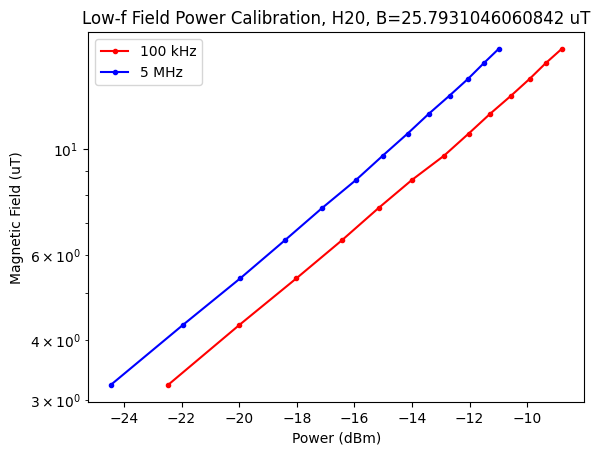

In [25]:
pow_hund = df_h5_100k['Power (dBm)']
pow_fivM = df_h5_5M['Power (dBm)']

mag_hund = df_h5_100k['Magnetic Field'] # Tesla
mag_fivM = df_h5_5M['Magnetic Field'] # Tesla

rsq_hundkhz = polyfit(pow_hund, df_h5_100k['Magnetic Field'], 1)
rsp_fivemhz = polyfit(pow_fivM, df_h5_5M['Magnetic Field'], 1)

plt.title("Low-f Field Power Calibration, H20, B=25.7931046060842 uT")
plt.xlabel("Power (dBm)")
plt.ylabel("Magnetic Field (uT)")
plt.plot(df_h20_hundkhz['Power (dBm)'], df_h20_hundkhz['Magnetic Field']*1e6, 'r.-', label="100 kHz")
plt.plot(df_h20_fiveMHz['Power (dBm)'], df_h20_fiveMHz['Magnetic Field']*1e6, 'b.-', label="5 MHz")
plt.yscale("log")
plt.legend()

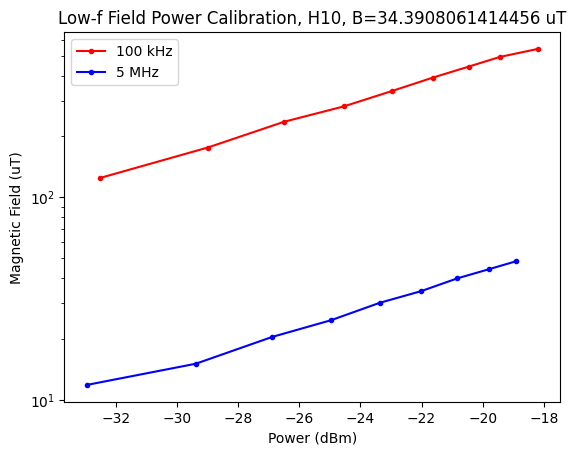

In [26]:
pow_hund = df_h10_100k['Power (dBm)']
pow_fivM = df_h10_5M['Power (dBm)']

mag_hund = df_h10_100k['Magnetic Field']
mag_fivM = df_h10_5M['Magnetic Field']

rsq_hundkhz = polyfit(pow_hund, df_h10_100k['Magnetic Field'], 1)
rsp_fivemhz = polyfit(pow_fivM, df_h10_5M['Magnetic Field'], 1)

## power proportional to B^2

plt.title("Low-f Field Power Calibration, H10, B=34.3908061414456 uT")
plt.xlabel("Power (dBm)")
plt.ylabel("Magnetic Field (uT)")
plt.plot(pow_hund, mag_hund*1e6, 'r.-', label="100 kHz")
plt.plot(pow_fivM, mag_fivM*1e6, 'b.-', label="5 MHz")
plt.yscale("log")
plt.legend()

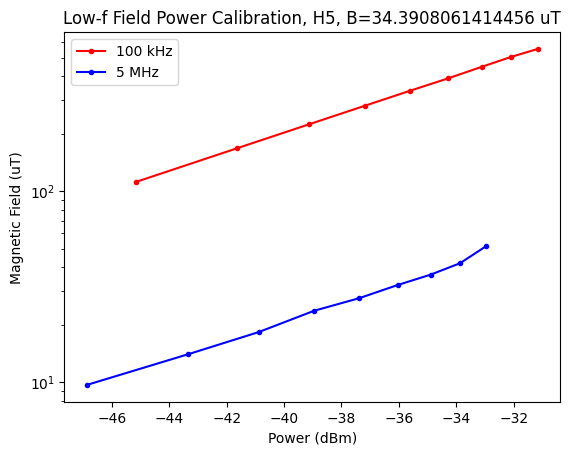

In [27]:
pow_hund = df_h5_100k['Power (dBm)']
pow_fivM = df_h5_5M['Power (dBm)']

mag_hund = df_h5_100k['Magnetic Field']
mag_fivM = df_h5_5M['Magnetic Field']

pow_h5_hund = pow_hund
pow_h5_fivM = pow_fivM

h5_mag_hund = mag_hund
h5_h10_fivM = mag_fivM

rsq_hundkhz = polyfit(pow_hund, df_h5_100k['Magnetic Field'], 1)
rsp_fivemhz = polyfit(pow_fivM, df_h5_5M['Magnetic Field'], 1)

plt.title("Low-f Field Power Calibration, H5, B=34.3908061414456 uT")
plt.xlabel("Power (dBm)")
plt.ylabel("Magnetic Field (uT)")
plt.plot(pow_hund, mag_hund*1e6, 'r.-', label="100 kHz")
plt.plot(pow_fivM, mag_fivM*1e6, 'b.-', label="5 MHz")
plt.yscale("log")
plt.legend()

In [28]:
rsq_freq = polyfit(np.log(df_h5_htp['Frequency (MHz)']), df_h5_htp['Power (dBm)'], 1)

freq = df_h5_htp['Frequency (MHz)']
powe = df_h5_htp['Power (dBm)']

print(f"Slope {rsq_freq['polynomial'][0]}")
slope = rsq_freq['polynomial'][0] ## slope for the np.log(freq)

matching = rsq_freq['polynomial'][1] + rsq_freq['polynomial'][0]*np.log(freq)

plt.plot(freq, matching)
plt.plot(freq, powe)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Frequency vs Power")

NameError: name 'df_h5_htp' is not defined

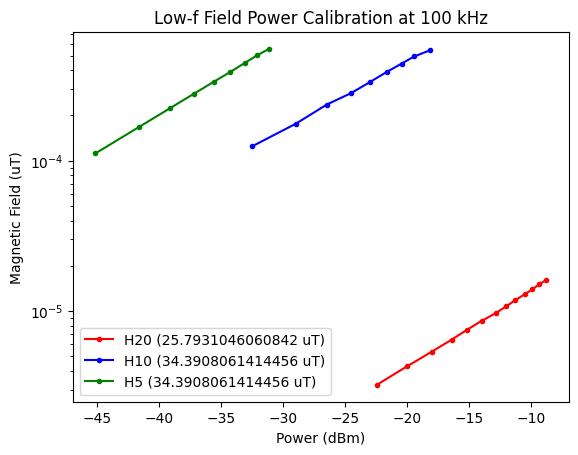

In [29]:
plt.plot(df_h20_hundkhz['Power (dBm)'], df_h20_hundkhz['Magnetic Field'], 'r.-', label="H20 (25.7931046060842 uT)")
plt.plot(df_h10_100k['Power (dBm)'], df_h10_100k['Magnetic Field'], 'b.-', label="H10 (34.3908061414456 uT)")
plt.plot(df_h5_100k['Power (dBm)'], df_h5_100k['Magnetic Field'], 'g.-', label="H5 (34.3908061414456 uT)")

plt.title("Low-f Field Power Calibration at 100 kHz")
plt.xlabel("Power (dBm)")
plt.ylabel("Magnetic Field (uT)")
plt.yscale("log")
plt.legend()

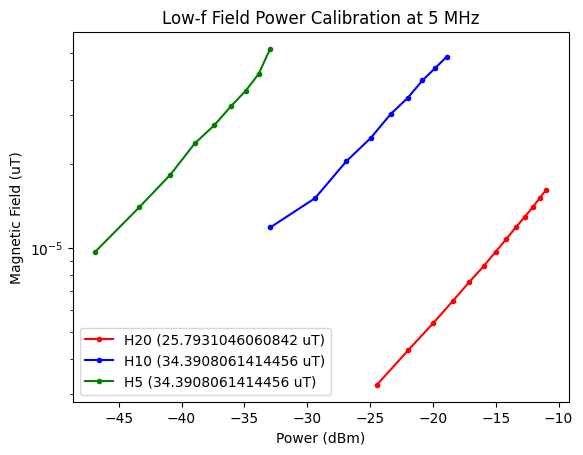

In [30]:
plt.plot(df_h20_fiveMHz['Power (dBm)'], df_h20_fiveMHz['Magnetic Field'], 'r.-', label="H20 (25.7931046060842 uT)")
plt.plot(df_h10_5M['Power (dBm)'], df_h10_5M['Magnetic Field'], 'b.-', label="H10 (34.3908061414456 uT)")
plt.plot(df_h5_5M['Power (dBm)'], df_h5_5M['Magnetic Field'], 'g.-', label="H5 (34.3908061414456 uT)")

plt.title("Low-f Field Power Calibration at 5 MHz")
plt.xlabel("Power (dBm)")
plt.ylabel("Magnetic Field (uT)")
plt.yscale("log")
plt.legend()

### Part 2.4 Plotting all Frequency vs Magnitudes Together (H20, H10, H5)

In [31]:
## the magnetic field for both of these is computed using a current = 6.4 mA (roughly)
current_v2 = 6.4 * np.pow(10.0, -3)
num_magfield = current_v2 * numTurns * 8 * 4 * np.pi * np.pow(10.0, -7)
mag_field = denom

## we know the magnetic field is constant; for these, we only vary the frequency and find the power
h10_htp = {'Frequency (MHz)':         [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1], 
            'Power (dBm)': [-19.06, -19.96, -20.66, -21.67, -22.93, -24.04, -26.08, -28.21, -31.18, -36.93]}

h5_htp = {'Frequency (MHz)':         [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1], 
           'Power (dBm)': [-32.74, -33.63, -34.3, -35.25, -36.45, -37.5, -39.46, -41.46, -44.25, -49.52]}

df_h10_htp = pd.DataFrame(h10_htp)

df_h5_htp = pd.DataFrame(h5_htp)

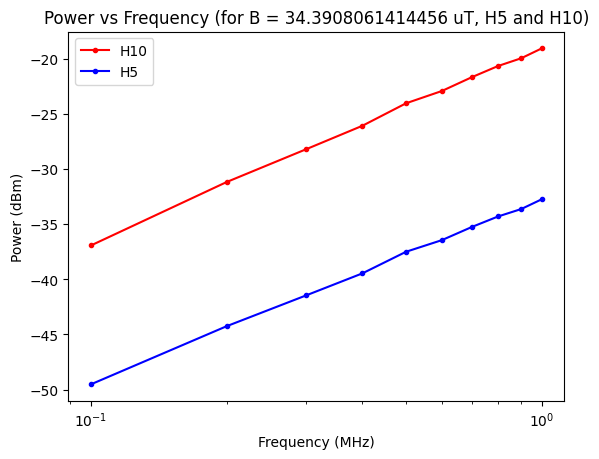

In [32]:
plt.plot(df_h10_htp['Frequency (MHz)'], df_h10_htp['Power (dBm)'], 'r.-', label="H10")
plt.plot(df_h5_htp['Frequency (MHz)'], df_h5_htp['Power (dBm)'], 'b.-', label="H5")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBm)")
plt.title("Power vs Frequency (for B = 34.3908061414456 uT, H5 and H10)")
plt.xscale("log")
plt.legend()

# Part 3: Graphing the Magnetic Field vs Distance from Infinite Wire

In [33]:
## Initial Data (too small)

infwire_h20_5M = {'Distance (inches)':         [0.0, 0.1, 0.2], 
                          'Power (dBm)': [-61.7, -65, -67.2]}
df_infwire_h20_5M = pd.DataFrame(infwire_h20_5M)

infwire_h20_100k = {'Distance (inches)':         [0.0, 0.1, 0.2], 
                          'Power (dBm)': [-69.3, -83, -90]}
df_infwire_h20_100k = pd.DataFrame(infwire_h20_100k)

Text(0, 0.5, 'Power (dBm)')

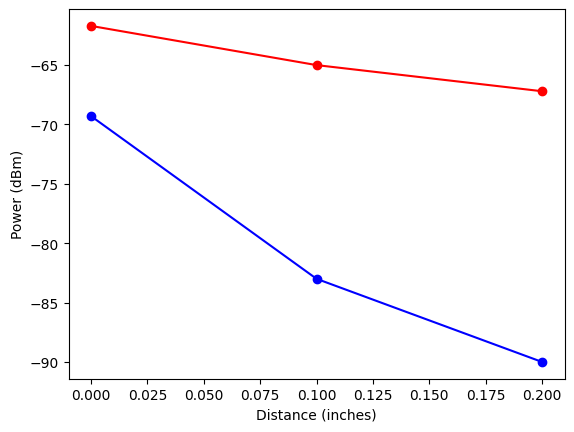

In [34]:
plt.plot(df_infwire_h20_5M['Distance (inches)'], df_infwire_h20_5M['Power (dBm)'], 'ro-')
plt.plot(df_infwire_h20_100k['Distance (inches)'], df_infwire_h20_100k['Power (dBm)'], 'bo-')
plt.xlabel("Distance (inches)")
plt.ylabel("Power (dBm)")

#### Graphing With More Datapoints (November 4)

In [35]:
inf_h20_5M = {'cm':    [0,        1,    2,    3,    4,    5,   10,15,20,25,30],
              'power': [-36.2,-45.0,-51.6,-55.8,-60.5,-63.7,-72.5,-76.9,-77,-77,-76.8]
             }

inf_h20_100k = {'cm':    [0,1,2,3,4,5,10,15,20,25,30],
              'power': [ -69.2,-78.6,-86.3,-93.4,-97,-97,-97,-97,-97,-97,-97]
               }

inf_h20_500k = {'cm':    [0,1,2,3,4,5,10,15,20,25,30],
              'power': [-54.5,-64.0,-70.8,-76.0,-80.9,-84.6,-96.9,-100.8,-102,-102,-102]
               }

df_inf_h20_5M = pd.DataFrame(inf_h20_5M) 
df_inf_h20_100k = pd.DataFrame(inf_h20_100k)
df_inf_h20_500 = pd.DataFrame(inf_h20_500k)    

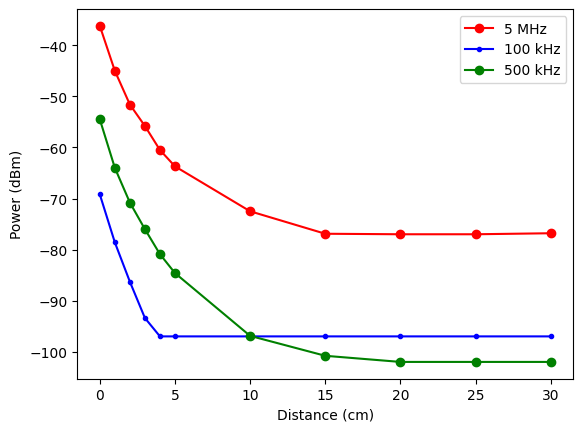

In [36]:
plt.plot(df_inf_h20_5M['cm'], df_inf_h20_5M['power'], 'ro-', label="5 MHz")
plt.plot(df_inf_h20_100k['cm'], df_inf_h20_100k['power'], 'b.-', label="100 kHz")
plt.plot(df_inf_h20_500['cm'], df_inf_h20_500['power'], 'go-', label="500 kHz")
plt.xlabel("Distance (cm)")
plt.ylabel("Power (dBm)")
plt.legend()

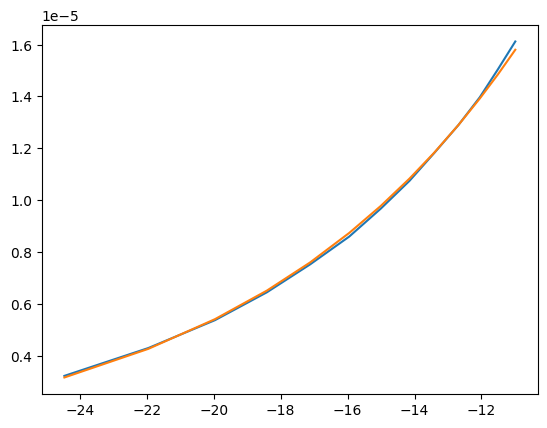

In [95]:
## plot what the magnetic field vs distance looks like

pow_fivM = df_h20_fiveMHz['Power (dBm)']
mag_fivM = df_h20_fiveMHz['Magnetic Field'] # Tesla
rsp_fivemhz = polyfit(pow_fivM,np.log(mag_fivM), 1)

interc = rsp_fivemhz['polynomial'][1]
slopes = rsp_fivemhz['polynomial'][0]

log_magvspow = interc + slopes*df_h20_fiveMHz['Power (dBm)']

plt.plot(pow_fivM, mag_fivM)
plt.plot(pow_fivM, np.exp(log_magvspow))

# plt.plot(df_inf_h20_5M['cm'], mag_field_vs_cm, 'ro-', label="H20")

# plt.title("Magnetic Field (Tesla) vs Distance (cm) of H20 Probe")
# plt.xlabel("Distance (cm)")
# plt.ylabel("Magnetic Field (Tesla)")
# plt.legend()

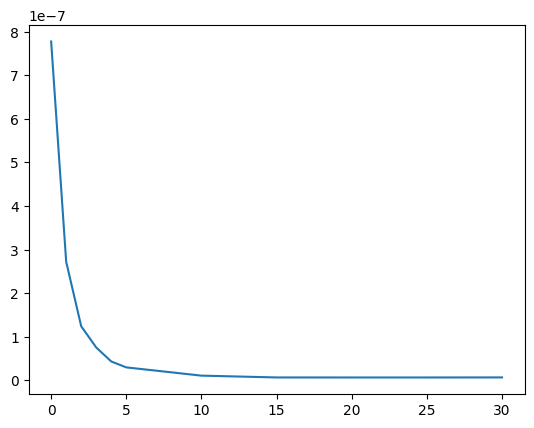

In [96]:
log_magtocm = interc + slopes*df_inf_h20_5M['power']

plt.plot(df_inf_h20_5M['cm'], np.exp(log_magtocm))

In [144]:
## calculate the anticipated disipation if we decrease from r: keep in mind that "0" is where the edge of the scope is next
##   to the wire, i.e. @ 0 the system is actually about 10 mm from the wire.

# takes in the starting power and just reduces it depending on r
def getMagField_5M(distance_m, current_0):
    num = 4 * np.pi * np.pow(10.0, -7) * current_0
    denom = 2 * np.pi * distance_m
    return num / denom

# radii - list of different potential radius r
# list1 -- the magnetic field list that we're comparing
def findClosestMatch(radii, list1):
    min_rad=0
    min_diff= 10000

    for rad in radii:
        denom = 4 * np.pi * np.pow(10.0, -7)
        num = 2 * np.pi * rad * np.pow(10.0, -3) * magneticField_0
        curr_0 = num/denom
        mag_expected = getMagField_5M(df_inf_h20_5M['cm']*0.01, curr_0)
        diff = np.abs(np.sum(list1 - mag_expected))
        if (diff < min_diff):
            min_rad = rad
            min_diff = diff
    
    return min_rad

8.238238238238239


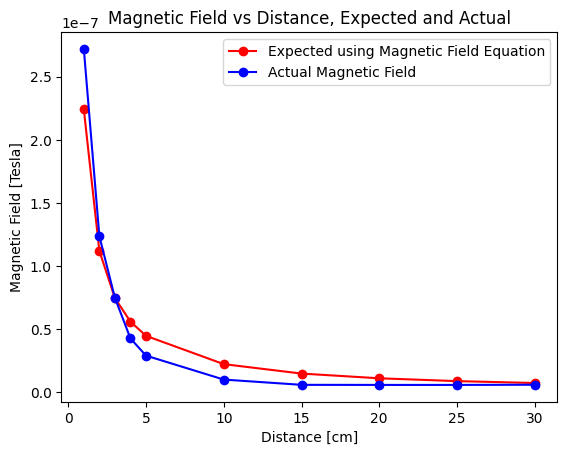

In [149]:
magneticField_0 = np.exp(log_magtocm[1])

radii = np.linspace(2, 10, 1000)
print(findClosestMatch(radii, np.exp(log_magtocm[1:])))

denom = 4 * np.pi * np.pow(10.0, -7)
num = 2 * np.pi * 8.238238238238239 * np.pow(10.0, -3) * magneticField_0
curr_0 = num/denom
mag_expected = getMagField_5M(df_inf_h20_5M['cm']*0.01, curr_0)

plt.plot(df_inf_h20_5M['cm'][1:], mag_expected[1:], 'ro-', label="Expected using Magnetic Field Equation")
plt.plot(df_inf_h20_5M['cm'][1:], np.exp(log_magtocm)[1:], 'bo-', label="Actual Magnetic Field")
plt.xlabel("Distance [cm]")
plt.ylabel("Magnetic Field [Tesla]")
plt.title("Magnetic Field vs Distance, Expected and Actual")
plt.legend()

### Graphing Odd Behavior in the E-Field

In [ ]:
e_field_VtoP_075_cm_28M = {'voltage':    [0.25, 0.46, 0.67, 0.9, 1.13, 1.35, 1.6, 1.82, 2.04, 2.24],
              'power': [-53.8, -46.8, -43.7, -41.2, -39.21, -37.6, -36.3, -35.12, -34.06, -32.7]
             }

# 0.174 V
e_field_ftoP_075cm_0_174V = {'frequency':    [38, 37, 36, 35, 34, 33, 32, 31, 30],
              'power': [-42, -42, -39, -37, -40, -42, -48, -50, -52.6]
             }
df_e_field_VtoP_075_cm_28M = pd.DataFrame(e_field_VtoP_075_cm_28M) 
df_e_field_ftoP_075cm_0_174V= pd.DataFrame(e_field_ftoP_075cm_0_174V)

In [ ]:
plt.plot(df_e_field_VtoP_075_cm_28M['voltage']/0.075, df_e_field_VtoP_075_cm_28M['power'], 'ro-', label="28 MHz, d=0.75cm")
plt.xlabel("Electric Field (V/m)")
plt.ylabel("Power (dBm)")
plt.title("Power vs Electric Field Plot")
plt.legend()

In [ ]:
plt.plot(df_e_field_VtoP_075_cm_28M['voltage']/0.075, df_e_field_VtoP_075_cm_28M['power'], 'ro-', label="28 MHz, d=0.75cm")
plt.xlabel("Electric Field (V/m)")
plt.ylabel("Power (dBm)")
plt.title("Power vs Electric Field Plot")
plt.xscale("log")
plt.legend()

In [ ]:
df_e_field_VtoP_075_cm_28M['e_field'] = df_e_field_VtoP_075_cm_28M['voltage']/0.075
rsq_freq = polyfit(df_e_field_VtoP_075_cm_28M['power'], np.log(df_e_field_VtoP_075_cm_28M['e_field']), 1)

slope = rsq_freq['polynomial'][0] ## slope for the np.log(freq)
interc = rsq_freq['polynomial'][1] ## slope for the np.log(freq)

plt.plot(df_e_field_VtoP_075_cm_28M['power'], np.exp(interc + slope*df_e_field_VtoP_075_cm_28M['power']), 'r.-', label="Fit Line")
plt.plot(df_e_field_VtoP_075_cm_28M['power'], df_e_field_VtoP_075_cm_28M['e_field'], 'b.-', label="Original Function")

print(f"If we wanted to get a dB of -18 dB, ")

In [ ]:
df_e_field_VtoP_075_cm_28M['e_field'] = df_e_field_VtoP_075_cm_28M['voltage']/0.075
rsq_freq = polyfit(df_e_field_VtoP_075_cm_28M['power'], np.log(df_e_field_VtoP_075_cm_28M['e_field']), 1)

slope = rsq_freq['polynomial'][0] ## slope for the np.log(freq)
interc = rsq_freq['polynomial'][1] ## slope for the np.log(freq)

plt.plot(df_e_field_VtoP_075_cm_28M['power'], interc + slope*df_e_field_VtoP_075_cm_28M['power'], 'r.-', label="Fit Line")
plt.plot(df_e_field_VtoP_075_cm_28M['power'], np.log(df_e_field_VtoP_075_cm_28M['e_field']), 'b.-', label="Original Function")

plt.xlabel("Power [dBm]")
plt.ylabel("Log of Electric Field [ log(V/m) ]")

e_field_18_9_dB = np.exp(interc + slope*(-18.9))

print(f"If we wanted to get a dB of -18 dB, we would need an electric field of {e_field_18_9_dB}")

In [ ]:
plt.plot(df_e_field_ftoP_075cm_0_174V['frequency'], df_e_field_ftoP_075cm_0_174V['power'], 'ro-', label="0.174 V, d=0.75cm")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBm)")
plt.title("Electric Probe Power vs Frequency Plot")
plt.legend()

# Part 4: Graphing 

## Calculating the Polyfit for the Frequency to Magnetic Field Data

In [ ]:
freq = [i*np.pow(10, 6) for i in df_h5_htp['Frequency (MHz)']]
powe = df_h5_htp['Power (dBm)']

rsq_freq = polyfit(np.log(freq), powe, 1)

print(f"Slope {rsq_freq['polynomial'][0]}")
slope = rsq_freq['polynomial'][0] ## slope for the np.log(freq)

matching = rsq_freq['polynomial'][1] + rsq_freq['polynomial'][0]*np.log(freq)

add_pts_xaxis = [freq[0], 28*np.pow(10, 6)]
add_pts = [matching[0], rsq_freq['polynomial'][1] + rsq_freq['polynomial'][0]*np.log(28*np.pow(10, 6))]

plt.plot(freq, powe, label="Original Data", linewidth=2)
plt.plot(freq, matching, '--', label="Line of Best Fit", linewidth=3)
plt.plot(add_pts_xaxis[1], add_pts[1], 'go', label="Estimated Location of dB for 28 MHz")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.xscale("log")
plt.title("Frequency vs Power for H5 = 30 uT")
plt.legend()

pow_hund = df_h5_100k['Power (dBm)']
pow_fivM = df_h5_5M['Power (dBm)']

mag_hund = df_h5_100k['Magnetic Field']
mag_fivM = df_h5_5M['Magnetic Field']

rsq_hundkhz = polyfit(np.log(mag_hund),pow_hund, 1)
rsp_fivemhz = polyfit(np.log(mag_hund), pow_fivM, 1)

print(f"Point at 28 MHz occurs at {rsq_freq['polynomial'][1] + rsq_freq['polynomial'][0]*np.log(28*np.pow(10, 6))}dB")
dB_30uT_at_28M = rsq_freq['polynomial'][1] + rsq_freq['polynomial'][0]*np.log(28*np.pow(10, 6))

In [ ]:
#pow_h5_hund
#pow_h5_fivM
#h5_mag_hund
#h5_h10_fivM

h5_hund_fit = polyfit(pow_h5_hund, np.log(h5_mag_hund), 1)
h5_fivM_fit = polyfit(pow_h5_fivM, np.log(h5_h10_fivM), 1)

print(h5_hund_fit['polynomial'][0], ", ", h5_fivM_fit['polynomial'][0])

print(h5_hund_fit['determination'], ", ", h5_fivM_fit['determination'])
average_slope_h5_powToMagLog = np.average([h5_hund_fit['polynomial'][0], h5_fivM_fit['polynomial'][0]])

In [ ]:
# calculate the log magnitude
plt.plot(np.log(mag_hund), rsq_hundkhz['polynomial'][1] + rsq_hundkhz['polynomial'][0]*np.log(mag_hund))
plt.plot(np.log(mag_hund), pow_hund)

point69_tes = np.log([34.3908061414456*np.pow(10.0, -6)])
point69_db = [rsq_hundkhz['polynomial'][1]+rsq_hundkhz['polynomial'][0]*np.log(34.3908061414456*np.pow(10.0, -6))]

point0_tes = np.log([ np.pow(10.0, -6)]) #, df_h5_100k['Magnetic Field'][0]])
point0_db =  [ rsq_hundkhz['polynomial'][1]+rsq_hundkhz['polynomial'][0]*np.log(np.pow(10.0, -6))] #, df_h5_100k['Power (dBm)'][0]]

plt.plot(point69_tes, point69_db, 'ro')
plt.plot(point0_tes, point0_db, 'bo')
plt.xlabel("Log of Magnetic Field")
plt.ylabel("Power")
plt.title("Log Magnitude vs Power for H5 = 100 kHz")

expectedPower = rsq_hundkhz['polynomial'][1]+rsq_hundkhz['polynomial'][0]* np.log (34.3908061414456*np.pow(10.0, -6))
expectedPower0 = rsq_hundkhz['polynomial'][1]+rsq_hundkhz['polynomial'][0]*np.log(np.pow(10.0, -6))
print(f"With the given slope, we have expected power {expectedPower0}dB at 100kHz, which kinda matches the plots we're seeing")

print(f"The slopes we're seeing are {rsq_hundkhz['polynomial'][0]} and {rsq_hundkhz['polynomial'][1]}")

In [ ]:
# With this in consideration, we know that we can now find the magnetic field for any given power. 
# We have a linear relationship to go from frequency to dB, and then a way to go from dB to magnetic field

rsq_freq = polyfit(np.log(df_h5_htp['Frequency (MHz)']), df_h5_htp['Power (dBm)'], 1). # MHz vs dBm

expectedPower = rsq_hundkhz['polynomial'][1]+rsq_hundkhz['polynomial'][0]* np.log (34.3908061414456*1e-6) # from T to dB
expectedPower0 = rsq_hundkhz['polynomial'][1]+rsq_hundkhz['polynomial'][0]*np.log(1e-6) # from T to dB

# The power that we would get for 28 MHz using the H5 probe (H = 31 uT):
dB_at_28M = rsq_freq['polynomial'][1] + rsq_freq['polynomial'][0] * np.log(28*1e6) # from frequency to dB

# the slope from dB to dB is determined by the average slope found previously.
# we know that the magnetic field we're starting at is 1 uT: resultantly, we know (slope)*(change in dB) + np.log(1 uT) = np.log(new uT)
log_uT_at_28M = average_slope_h5_powToMagLog*(dB_at_28M-dB_30uT_at_28M ) + np.log(34.3908061414456*1e-6)
#^ from dB to log(T)

print(log_uT_at_28M) # should be log(T)

In [ ]:
h5_hund_fit = polyfit(pow_h5_hund, np.log(h5_mag_hund), 1) ## slope of log(Magnetic Field) = m(pow) + b
h5_fivM_fit = polyfit(pow_h5_fivM, np.log(h5_h10_fivM), 1)

points_28M_uT = [np.log(34.3908061414456*1e-6), log_uT_at_28M] # magnetic fields (in log(Teslas)
points_28M_dB = [dB_30uT_at_28M, dB_at_28M]               # power (in dB)

h5_hund_logMag = h5_hund_fit['polynomial'][1] + h5_hund_fit['polynomial'][0]*np.asarray(points_28M_dB) # in log(Tesla)
h5_fivM_logMag = h5_fivM_fit['polynomial'][1] + h5_fivM_fit['polynomial'][0]*np.asarray(points_28M_dB) # in log(Tesla)

plt.plot(points_28M_uT, points_28M_dB, 'ro-', label="28 MHz") # plot the points for 28 M

plt.plot(np.log(mag_hund), pow_hund, 'bo-', label="100 kHz")          # 
plt.plot(np.log(mag_fivM), pow_fivM, 'go-', label="5 MHz")

plt.plot(h5_hund_logMag, points_28M_dB, 'bo--', label="Expected 100 kHz", alpha=0.25) # plot the points for 100 kHz
plt.plot(h5_fivM_logMag, points_28M_dB, 'go--', label="Expected 5 MHz", alpha=0.25) # plot the points for 5 MHz

plt.xlabel("Log of Magnetic Field (H)")
plt.ylabel("Power (dB)")
plt.legend()

print(f"The Magnetic field at -8 dB is {log_uT_at_28M:.2f} log(T)")

print(f"This corresponds with {np.exp(log_uT_at_28M)} T")
      
## graph the projected slopes of the lines to show what we'd expect to see
# magnetic field =      b                     +           m * pow

In [ ]:
uT_at_28M = np.exp(log_uT_at_28M)
resistance = (160) / (uT_at_28M)
print(resistance)

In [ ]:
db_100k = rsq_freq['polynomial'][1] + rsq_freq['polynomial'][0]*np.log(0.1)
db_5M = rsq_freq['polynomial'][1] + rsq_freq['polynomial'][0]*np.log(5)

db_100_for_neg69 = rsq_hundkhz['polynomial'][1] + rsq_hundkhz['polynomial'][0]*np.log(69)
db_5M_for_neg69 = rsp_fivemhz['polynomial'][1] + rsp_fivemhz['polynomial'][0]*np.log(69)

print(f"db_100k = {db_100k}dB, and db_5M = {db_5M}dB")
print(f"For the actual plots of H5: 100 kHz has 69uT at {db_100_for_neg69}, and 5 MHz has 69uT at {db_5M_for_neg69}")

In [ ]:
## we know the magnetic field is constant; for these, we only vary the frequency and find the power
h5_htp_1uT = {'Frequency (MHz)':         [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3], 
            'Power (dBm)': [-80, -80.5, -81, -82.5, -84.5, -86.5, -88, -90]}

h10_htp_1uT = {'Frequency (MHz)':         [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3], 
           'Power (dBm)': [-57, -57.5, -58.5, -60, -61.5, -63, -65.5, -69]}

h20_htp_1uT = {'Frequency (MHz)':         [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3], 
           'Power (dBm)': [-39, -40, -41, -42.5, -44, -45, -47, -50]}

df_h5_htp_1uT = pd.DataFrame(h5_htp_1uT)
df_h10_htp_1uT = pd.DataFrame(h10_htp_1uT)
df_h20_htp_1uT = pd.DataFrame(h20_htp_1uT)

In [ ]:
plt.plot(df_h10_htp['Frequency (MHz)'], df_h10_htp['Power (dBm)'], 'ro-', label="H10, 34.3908061414456 uT")
plt.plot(df_h10_htp_1uT['Frequency (MHz)'], df_h10_htp_1uT['Power (dBm)'], 'r.-', label="H10, 1 uT", alpha = 0.35)


plt.plot(df_h5_htp['Frequency (MHz)'], df_h5_htp['Power (dBm)'], 'bo-', label="H5, 34.3908061414456 uT")
plt.plot(df_h5_htp_1uT['Frequency (MHz)'], df_h5_htp_1uT['Power (dBm)'], 'b.-', label="H5, 1 uT", alpha = 0.35)

#df_h20_freqtopow_4_8mV
plt.plot(df_h20_freqtopow_4_8mV['Frequency (MHz)'], df_h20_freqtopow_4_8mV['Power (dBm)'], 'go-', label="H20, 25.7931046060842 uT")
plt.plot(h20_htp_1uT['Frequency (MHz)'], h20_htp_1uT['Power (dBm)'], 'g.-', label="H20, 1 uT", alpha = 0.35)


plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBm)")
plt.xscale("log")
plt.legend()
plt.title("Frequency vs Power for all H values")

In [ ]:
plt.plot(df_h10_htp['Frequency (MHz)'][:-2], df_h10_htp['Power (dBm)'][:-2], 'ro-', label="H10, 34.3908061414456 uT")
plt.plot(df_h10_htp_1uT['Frequency (MHz)'], df_h10_htp_1uT['Power (dBm)'], 'r.-', label="H10, 1 uT", alpha = 0.35)


plt.plot(df_h5_htp['Frequency (MHz)'][:-2], df_h5_htp['Power (dBm)'][:-2], 'bo-', label="H5, 34.3908061414456 uT")
plt.plot(df_h5_htp_1uT['Frequency (MHz)'], df_h5_htp_1uT['Power (dBm)'], 'b.-', label="H5, 1 uT", alpha = 0.35)

#df_h20_freqtopow_4_8mV
plt.plot(df_h20_freqtopow_4_8mV['Frequency (MHz)'][:-2], df_h20_freqtopow_4_8mV['Power (dBm)'][:-2], 'go-', label="H20, 25.7931046060842 uT")
plt.plot(h20_htp_1uT['Frequency (MHz)'], h20_htp_1uT['Power (dBm)'], 'g.-', label="H20, 1 uT", alpha = 0.35)

avg_dif_h5 = np.mean(df_h5_htp['Power (dBm)'][:-2] - df_h5_htp_1uT['Power (dBm)'])
avg_dif_h10 = np.mean(df_h10_htp['Power (dBm)'][:-2] - df_h10_htp_1uT['Power (dBm)'])
avg_dif_h20 = np.mean(df_h20_freqtopow_4_8mV['Power (dBm)'][:-2] - h20_htp_1uT['Power (dBm)'])

plt.legend()
plt.title("Plotting Power by Frequencies, calculating Average Difference")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBm)")
plt.xscale("log")

print("Average Differences: ")
print(f"H20: {avg_dif_h20} (25.7931046060842 times greater)")
print(f"H10: {avg_dif_h10} (34.3908061414456 times greater)")
print(f"H5: {avg_dif_h5} (34.3908061414456 times greater)")